# 라이브러리 로드

In [6]:
import pandas as pd
import numpy as np
from matplotlib import font_manager, rc
import matplotlib.font_manager as fm

In [7]:
import os
os.getcwd()

'c:\\tutorial\\7.Pandas join'

In [8]:
DATA_PATH = '../7.Pandas join/'

df = pd.read_csv(DATA_PATH+ "train.csv")

In [9]:
df.shape, df.columns

((891, 12),
 Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
        'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
       dtype='object'))

In [10]:
df.columns = [col.lower() for col in df.columns] # 컬럼명 소문자로 변환
df.columns

Index(['passengerid', 'survived', 'pclass', 'name', 'sex', 'age', 'sibsp',
       'parch', 'ticket', 'fare', 'cabin', 'embarked'],
      dtype='object')

# 데이터 확인

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   passengerid  891 non-null    int64  
 1   survived     891 non-null    int64  
 2   pclass       891 non-null    int64  
 3   name         891 non-null    object 
 4   sex          891 non-null    object 
 5   age          714 non-null    float64
 6   sibsp        891 non-null    int64  
 7   parch        891 non-null    int64  
 8   ticket       891 non-null    object 
 9   fare         891 non-null    float64
 10  cabin        204 non-null    object 
 11  embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [12]:
df.describe()

,passengerid,survived,pclass,age,sibsp,parch,fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [13]:
df.head()

,passengerid,survived,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [14]:
df.tail()

,passengerid,survived,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


# 타겟 데이터 확인

In [15]:
new_survived = pd.Categorical(df['survived'])
new_survived = new_survived.rename_categories(['Died', 'Survived'])

new_survived.describe()

,counts,freqs
categories,,
Died,549,0.616162
Survived,342,0.383838


# 데이터 분리

In [16]:
from sklearn.model_selection import train_test_split

C:\Users\Playdata\AppData\Local\Temp\ipykernel_19500\4173785138.py:5: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corrmat = df.corr(method='spearman')


<AxesSubplot: >

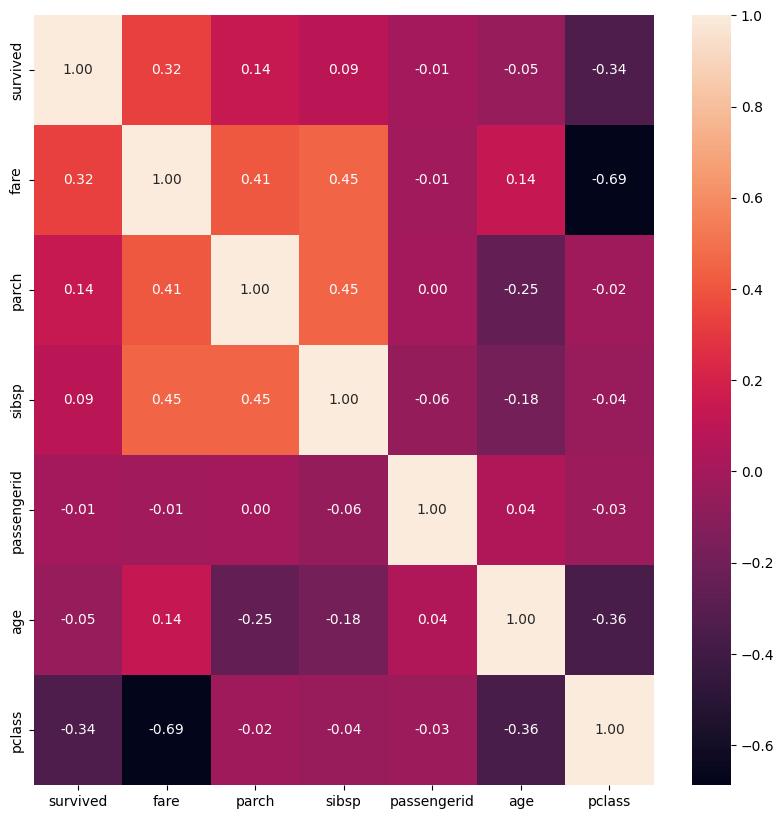

In [17]:
import seaborn as sns
import matplotlib.pyplot as plt

fig, ax = plt.subplots(1, 1, figsize=(10,10))
corrmat = df.corr(method='spearman')
indexes = corrmat.nlargest(n=11, columns='survived').index
corrmat = df[indexes].corr(method='spearman')
sns.heatmap(data=corrmat, annot=True, cbar=True, fmt='.2f', ax=ax)

In [18]:
SEED = 42

X_tr, X_te = train_test_split(df, random_state=SEED, test_size= 0.2)
X_tr =X_tr.reset_index(drop = True)
X_te = X_te.reset_index(drop= True)


X_tr.shape, X_te.shape

((712, 12), (179, 12))

In [19]:
X_tr.columns

Index(['passengerid', 'survived', 'pclass', 'name', 'sex', 'age', 'sibsp',
       'parch', 'ticket', 'fare', 'cabin', 'embarked'],
      dtype='object')

In [20]:
new_survived = pd.Categorical(X_tr['survived'])
new_survived = new_survived.rename_categories(['Died', 'Survived'])
print(new_survived[:5])
new_survived.describe()

['Died', 'Died', 'Died', 'Died', 'Died']
Categories (2, object): ['Died', 'Survived']


,counts,freqs
categories,,
Died,444,0.623596
Survived,268,0.376404


# Data Cleaning

In [21]:
X_tr['passengerid'].nunique(), X_tr.shape[0]

(712, 712)

In [22]:
# 위의 데이터는 전체 데이터가 유니크 하기 때문에 삭제

X_tr.drop('passengerid', axis=1, inplace=True)
X_te.drop('passengerid', axis=1, inplace=True)

In [23]:
(X_tr.isnull().sum() / X_tr.shape[0]).round(4).sort_values(ascending=False)

cabin       0.7767
age         0.1966
embarked    0.0028
survived    0.0000
pclass      0.0000
name        0.0000
sex         0.0000
sibsp       0.0000
parch       0.0000
ticket      0.0000
fare        0.0000
dtype: float64

In [24]:
print(f'before: {X_tr.shape} / isna().sum(): {X_tr.isna().sum().sum()}')

X_tr = X_tr.drop('cabin', axis=1)
X_te = X_te.drop('cabin', axis=1)
print(f'after: {X_tr.shape} / isnull().sum(): {X_tr.isnull().sum().sum()}')

before: (712, 11) / isna().sum(): 695
after: (712, 10) / isnull().sum(): 142


In [25]:
X_tr['age'] = X_tr['age'].fillna(X_tr['age'].median())
X_te['age'] = X_te['age'].fillna(X_tr['age'].median())

In [26]:
embarked_mode = X_tr['embarked'].mode().values[0]

X_tr['embarked'] = X_tr['embarked'].fillna(embarked_mode)
X_te['embarked'] = X_te['embarked'].fillna(embarked_mode)

In [27]:
X_tr.isna().sum().sum(), X_te.isna().sum().sum()

(0, 0)

# Feature Extraction

> 기존 Feature에 기반하여 새로운 Feature들을 생성

In [28]:
X_tr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 712 entries, 0 to 711
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   survived  712 non-null    int64  
 1   pclass    712 non-null    int64  
 2   name      712 non-null    object 
 3   sex       712 non-null    object 
 4   age       712 non-null    float64
 5   sibsp     712 non-null    int64  
 6   parch     712 non-null    int64  
 7   ticket    712 non-null    object 
 8   fare      712 non-null    float64
 9   embarked  712 non-null    object 
dtypes: float64(2), int64(4), object(4)
memory usage: 55.8+ KB


### 수치형 데이터 타입 변환

In [29]:
df_number = X_tr.select_dtypes(include=np.number)
df_number.columns

Index(['survived', 'pclass', 'age', 'sibsp', 'parch', 'fare'], dtype='object')

In [30]:
df_number.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 712 entries, 0 to 711
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   survived  712 non-null    int64  
 1   pclass    712 non-null    int64  
 2   age       712 non-null    float64
 3   sibsp     712 non-null    int64  
 4   parch     712 non-null    int64  
 5   fare      712 non-null    float64
dtypes: float64(2), int64(4)
memory usage: 33.5 KB


In [31]:
df_number.head()

,survived,pclass,age,sibsp,parch,fare
0,0,1,45.5,0,0,28.5000
1,0,2,23.0,0,0,13.0000
2,0,3,32.0,0,0,7.9250
3,0,3,26.0,1,0,7.8542
4,0,3,6.0,4,2,31.2750


In [32]:
# survived

X_tr['survived'] = X_tr['survived'].astype('int32')
X_te['survived'] = X_te['survived'].astype('int32')

In [33]:
X_tr['pclass'].unique()

array([1, 2, 3], dtype=int64)

In [34]:
X_tr['pclass'] = X_tr['pclass'].astype('category')
X_te['pclass'] = X_te['pclass'].astype('category')

In [35]:
X_tr['age'] = X_tr['age'].astype('int32')
X_te['age'] = X_te['age'].astype('int32')

In [36]:
X_tr['sibsp'].unique()

array([0, 1, 4, 3, 2, 8, 5], dtype=int64)

In [37]:
X_tr['sibsp'] = X_tr['sibsp'].astype('category')
X_te['sibsp'] = X_te['sibsp'].astype('category')

In [38]:
X_tr['parch'].unique()

array([0, 2, 1, 6, 4, 3, 5], dtype=int64)

In [39]:
X_tr['parch'] = X_tr['parch'].astype('category')
X_te['parch'] = X_te['parch'].astype('category')

In [40]:
X_tr["fare"] = X_tr["fare"].astype("float32")
X_te["fare"] = X_te["fare"].astype("float32")

In [41]:
X_tr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 712 entries, 0 to 711
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   survived  712 non-null    int32   
 1   pclass    712 non-null    category
 2   name      712 non-null    object  
 3   sex       712 non-null    object  
 4   age       712 non-null    int32   
 5   sibsp     712 non-null    category
 6   parch     712 non-null    category
 7   ticket    712 non-null    object  
 8   fare      712 non-null    float32 
 9   embarked  712 non-null    object  
dtypes: category(3), float32(1), int32(2), object(4)
memory usage: 33.6+ KB


### 범주형 데이터 타입 변환

In [42]:
df_object = X_tr.select_dtypes(include='object')

In [43]:
df_object.head()

,name,sex,ticket,embarked
0,"Partner, Mr. Austen",male,113043,S
1,"Berriman, Mr. William John",male,28425,S
2,"Tikkanen, Mr. Juho",male,STON/O 2. 3101293,S
3,"Hansen, Mr. Henrik Juul",male,350025,S
4,"Andersson, Miss. Ebba Iris Alfrida",female,347082,S


In [44]:
X_tr['sex'] = X_tr['sex'].astype('category')
X_tr['sex'] = X_te['sex'].astype('category')

In [45]:
X_tr['embarked'] = X_tr['embarked'].astype('category')
X_tr['embarked'] = X_tr['embarked'].astype('category')


In [46]:
X_tr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 712 entries, 0 to 711
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   survived  712 non-null    int32   
 1   pclass    712 non-null    category
 2   name      712 non-null    object  
 3   sex       179 non-null    category
 4   age       712 non-null    int32   
 5   sibsp     712 non-null    category
 6   parch     712 non-null    category
 7   ticket    712 non-null    object  
 8   fare      712 non-null    float32 
 9   embarked  712 non-null    category
dtypes: category(5), float32(1), int32(2), object(2)
memory usage: 24.1+ KB


In [47]:
X_tr.head()

,survived,pclass,name,sex,age,sibsp,parch,ticket,fare,embarked
0,0,1,"Partner, Mr. Austen",male,45,0,0,113043,28.5000,S
1,0,2,"Berriman, Mr. William John",male,23,0,0,28425,13.0000,S
2,0,3,"Tikkanen, Mr. Juho",male,32,0,0,STON/O 2. 3101293,7.9250,S
3,0,3,"Hansen, Mr. Henrik Juul",female,26,1,0,350025,7.8542,S
4,0,3,"Andersson, Miss. Ebba Iris Alfrida",female,6,4,2,347082,31.2750,S


# 문자열

In [48]:
df_object = X_tr.select_dtypes(include='object')
df_object.columns

Index(['name', 'ticket'], dtype='object')

### 공백제거

In [49]:
X_tr['name'] = X_tr['name'].map(lambda x:x.strip())
X_te['name'] = X_te['name'].map(lambda x:x.strip())

X_tr['ticket'] = X_tr['ticket'].map(lambda x:x.strip())
X_te['ticket'] = X_te['ticket'].map(lambda x:x.strip())

### 문자열 포함 여부

In [50]:
dict_designation = {
    'Mr.': '남성',
    'Master.': '남성',
    'Sir.': '남성',
    'Miss.': '미혼 여성',
    'Mrs.': '기혼 여성',
    'Ms.': '미혼/기혼 여성',
    'Lady.': '숙녀',
    'Mlle.': '아가씨',
    # 직업
    'Dr.': '의사',
    'Rev.': '목사',
    'Major.': '계급',
    'Don.': '교수',
    'Col.': '군인',
    'Capt.': '군인',
    # 귀족
    'Mme.': '영부인',
    'Countess.': '백작부인',
    'Jonkheer.': '귀족'
}

def add_designation(name): # 호칭 함수
  designation = "unknown"
  for key in dict_designation.keys():
    if key in name:
      designation = key
      break
  return designation

X_tr['designation'] = X_tr['name'].map(lambda x: add_designation(x))
X_te['designation'] = X_te['name'].map(lambda x: add_designation(x))

In [51]:
cond = X_tr['designation'] == 'unknown'
X_tr.loc[cond].head()

,survived,pclass,name,sex,age,sibsp,parch,ticket,fare,embarked,designation


In [52]:
cond = X_te['designation'] == 'unknown'
X_te.loc[cond].head()

,survived,pclass,name,sex,age,sibsp,parch,ticket,fare,embarked,designation


### 문자열 분리

In [53]:
X_tr['last_name'] = X_tr['name'].map(lambda x:x.split(',')[0])
X_te['last_name'] = X_te['name'].map(lambda x:x.split(',')[0])

X_tr.head()

,survived,pclass,name,sex,age,sibsp,parch,ticket,fare,embarked,designation,last_name
0,0,1,"Partner, Mr. Austen",male,45,0,0,113043,28.5000,S,Mr.,Partner
1,0,2,"Berriman, Mr. William John",male,23,0,0,28425,13.0000,S,Mr.,Berriman
2,0,3,"Tikkanen, Mr. Juho",male,32,0,0,STON/O 2. 3101293,7.9250,S,Mr.,Tikkanen
3,0,3,"Hansen, Mr. Henrik Juul",female,26,1,0,350025,7.8542,S,Mr.,Hansen
4,0,3,"Andersson, Miss. Ebba Iris Alfrida",female,6,4,2,347082,31.2750,S,Miss.,Andersson


In [54]:
def add_ticket_number(ticket):
    try:
        ticket_split = ticket.split(' ')
        return int(ticket_split)[-1]
    except:
        return 0 # ticket이 Line인 경우
    
X_tr['ticket_number'] = X_tr['ticket'].map(lambda x: add_ticket_number(x)).astype("int32")
X_te['ticket_number'] = X_te['ticket'].map(lambda x: add_ticket_number(x)).astype("int32")

X_tr.head()

,survived,pclass,name,sex,age,sibsp,parch,ticket,fare,embarked,designation,last_name,ticket_number
0,0,1,"Partner, Mr. Austen",male,45,0,0,113043,28.5000,S,Mr.,Partner,0
1,0,2,"Berriman, Mr. William John",male,23,0,0,28425,13.0000,S,Mr.,Berriman,0
2,0,3,"Tikkanen, Mr. Juho",male,32,0,0,STON/O 2. 3101293,7.9250,S,Mr.,Tikkanen,0
3,0,3,"Hansen, Mr. Henrik Juul",female,26,1,0,350025,7.8542,S,Mr.,Hansen,0
4,0,3,"Andersson, Miss. Ebba Iris Alfrida",female,6,4,2,347082,31.2750,S,Miss.,Andersson,0


# 집계

### 피봇 테이블

In [55]:
df_pivot = pd.pivot_table(X_tr, index='pclass', values='fare', aggfunc='mean').reset_index()
df_pivot.rename(columns= {'fare': 'fare_mean_by_pclass'}, inplace=True)
df_pivot.head()

,pclass,fare_mean_by_pclass
0,1,89.253914
1,2,20.575939
2,3,13.934861


In [56]:
print(f'before: {X_tr.shape}')
X_tr = pd.merge(X_tr, df_pivot, how='left', on = 'pclass')
X_te = pd.merge(X_te, df_pivot, how='left', on = 'pclass')
print(f'after: {X_tr.shape}')
X_tr.head()

before: (712, 13)
after: (712, 14)


,survived,pclass,name,sex,age,sibsp,parch,ticket,fare,embarked,designation,last_name,ticket_number,fare_mean_by_pclass
0,0,1,"Partner, Mr. Austen",male,45,0,0,113043,28.5000,S,Mr.,Partner,0,89.253914
1,0,2,"Berriman, Mr. William John",male,23,0,0,28425,13.0000,S,Mr.,Berriman,0,20.575939
2,0,3,"Tikkanen, Mr. Juho",male,32,0,0,STON/O 2. 3101293,7.9250,S,Mr.,Tikkanen,0,13.934861
3,0,3,"Hansen, Mr. Henrik Juul",female,26,1,0,350025,7.8542,S,Mr.,Hansen,0,13.934861
4,0,3,"Andersson, Miss. Ebba Iris Alfrida",female,6,4,2,347082,31.2750,S,Miss.,Andersson,0,13.934861


### 그룹

In [57]:
agg_dict = {'survived' : 'mean', 'sibsp': 'nunique', 'parch': 'nunique'}
df_groupby = X_tr.groupby('pclass').agg(agg_dict).reset_index()
df_groupby.rename(columns={'survived': 'survived_by_pclass', 'sibsp' : 'len_sibsp_by_pclass', 'parch' : 'len_parch_by_pclass'}, inplace = True)
df_groupby

,pclass,survived_by_pclass,len_sibsp_by_pclass,len_parch_by_pclass
0,1,0.607362,4,4
1,2,0.483444,4,4
2,3,0.241206,7,7


In [58]:
print(f'before: {X_tr.shape}')
X_tr = pd.merge(X_tr, df_groupby, how= 'left', on='pclass')
X_te = pd.merge(X_te, df_groupby, how= 'left', on='pclass')
print(f'after: {X_tr.shape}')
X_tr.head()

before: (712, 14)
after: (712, 17)


,survived,pclass,name,sex,age,sibsp,parch,ticket,fare,embarked,designation,last_name,ticket_number,fare_mean_by_pclass,survived_by_pclass,len_sibsp_by_pclass,len_parch_by_pclass
0,0,1,"Partner, Mr. Austen",male,45,0,0,113043,28.5000,S,Mr.,Partner,0,89.253914,0.607362,4,4
1,0,2,"Berriman, Mr. William John",male,23,0,0,28425,13.0000,S,Mr.,Berriman,0,20.575939,0.483444,4,4
2,0,3,"Tikkanen, Mr. Juho",male,32,0,0,STON/O 2. 3101293,7.9250,S,Mr.,Tikkanen,0,13.934861,0.241206,7,7
3,0,3,"Hansen, Mr. Henrik Juul",female,26,1,0,350025,7.8542,S,Mr.,Hansen,0,13.934861,0.241206,7,7
4,0,3,"Andersson, Miss. Ebba Iris Alfrida",female,6,4,2,347082,31.2750,S,Miss.,Andersson,0,13.934861,0.241206,7,7


## 데이터 변환/조합

appy(), map() 활용

In [59]:
def sub_age(age):
    return age//10 #age % 10

X_tr['sub_age'] = X_tr['age'].map(lambda x: sub_age(x))
X_te['sub_age'] = X_te['age'].map(lambda x: sub_age(x))

X_tr.head()

,survived,pclass,name,sex,age,sibsp,parch,ticket,fare,embarked,designation,last_name,ticket_number,fare_mean_by_pclass,survived_by_pclass,len_sibsp_by_pclass,len_parch_by_pclass,sub_age
0,0,1,"Partner, Mr. Austen",male,45,0,0,113043,28.5000,S,Mr.,Partner,0,89.253914,0.607362,4,4,4
1,0,2,"Berriman, Mr. William John",male,23,0,0,28425,13.0000,S,Mr.,Berriman,0,20.575939,0.483444,4,4,2
2,0,3,"Tikkanen, Mr. Juho",male,32,0,0,STON/O 2. 3101293,7.9250,S,Mr.,Tikkanen,0,13.934861,0.241206,7,7,3
3,0,3,"Hansen, Mr. Henrik Juul",female,26,1,0,350025,7.8542,S,Mr.,Hansen,0,13.934861,0.241206,7,7,2
4,0,3,"Andersson, Miss. Ebba Iris Alfrida",female,6,4,2,347082,31.2750,S,Miss.,Andersson,0,13.934861,0.241206,7,7,0


In [60]:
def add_sum_embarked(row):
    return str(row['embarked']) + str(row['pclass']) + str(row['sibsp']) + str(row['parch'])

X_tr['sub_embarked'] = X_tr.apply(lambda row: add_sum_embarked(row), axis=1)
X_te['sub_embarked'] = X_te.apply(lambda row: add_sum_embarked(row), axis=1)
X_tr.head()

,survived,pclass,name,sex,age,sibsp,parch,ticket,fare,embarked,designation,last_name,ticket_number,fare_mean_by_pclass,survived_by_pclass,len_sibsp_by_pclass,len_parch_by_pclass,sub_age,sub_embarked
0,0,1,"Partner, Mr. Austen",male,45,0,0,113043,28.5000,S,Mr.,Partner,0,89.253914,0.607362,4,4,4,S100
1,0,2,"Berriman, Mr. William John",male,23,0,0,28425,13.0000,S,Mr.,Berriman,0,20.575939,0.483444,4,4,2,S200
2,0,3,"Tikkanen, Mr. Juho",male,32,0,0,STON/O 2. 3101293,7.9250,S,Mr.,Tikkanen,0,13.934861,0.241206,7,7,3,S300
3,0,3,"Hansen, Mr. Henrik Juul",female,26,1,0,350025,7.8542,S,Mr.,Hansen,0,13.934861,0.241206,7,7,2,S310
4,0,3,"Andersson, Miss. Ebba Iris Alfrida",female,6,4,2,347082,31.2750,S,Miss.,Andersson,0,13.934861,0.241206,7,7,0,S342


# 날짜

In [61]:
DATA_PATH = "./"

df_cinemaTicket = pd.read_csv(DATA_PATH+ "cinemaTicket_Ref.csv")

In [62]:
df_cinemaTicket.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 142524 entries, 0 to 142523
Data columns (total 14 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   film_code     142524 non-null  int64  
 1   cinema_code   142524 non-null  int64  
 2   total_sales   142524 non-null  int64  
 3   tickets_sold  142524 non-null  int64  
 4   tickets_out   142524 non-null  int64  
 5   show_time     142524 non-null  int64  
 6   occu_perc     142399 non-null  float64
 7   ticket_price  142524 non-null  float64
 8   ticket_use    142524 non-null  int64  
 9   capacity      142399 non-null  float64
 10  date          142524 non-null  object 
 11  month         142524 non-null  int64  
 12  quarter       142524 non-null  int64  
 13  day           142524 non-null  int64  
dtypes: float64(3), int64(10), object(1)
memory usage: 15.2+ MB


### datetime 적용

In [63]:
df_cinemaTicket['date'] = pd.to_datetime(df_cinemaTicket['date'])
df_cinemaTicket.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 142524 entries, 0 to 142523
Data columns (total 14 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   film_code     142524 non-null  int64         
 1   cinema_code   142524 non-null  int64         
 2   total_sales   142524 non-null  int64         
 3   tickets_sold  142524 non-null  int64         
 4   tickets_out   142524 non-null  int64         
 5   show_time     142524 non-null  int64         
 6   occu_perc     142399 non-null  float64       
 7   ticket_price  142524 non-null  float64       
 8   ticket_use    142524 non-null  int64         
 9   capacity      142399 non-null  float64       
 10  date          142524 non-null  datetime64[ns]
 11  month         142524 non-null  int64         
 12  quarter       142524 non-null  int64         
 13  day           142524 non-null  int64         
dtypes: datetime64[ns](1), float64(3), int64(10)
memory usage: 15.2 MB


In [64]:
df_cinemaTicket['date'][:5]

0   2018-05-05
1   2018-05-05
2   2018-05-05
3   2018-05-05
4   2018-05-05
Name: date, dtype: datetime64[ns]

In [65]:
df_cinemaTicket['date'].dt.year[:5]

0    2018
1    2018
2    2018
3    2018
4    2018
Name: date, dtype: int64

In [66]:
df_cinemaTicket['date'].dt.month[:5]

0    5
1    5
2    5
3    5
4    5
Name: date, dtype: int64

In [67]:
df_cinemaTicket['date'].dt.day[:5]

0    5
1    5
2    5
3    5
4    5
Name: date, dtype: int64

In [68]:
df_cinemaTicket['date'].dt.quarter[:5]

0    2
1    2
2    2
3    2
4    2
Name: date, dtype: int64

In [69]:
df_cinemaTicket['date'].dt.dayofyear[:5]

0    125
1    125
2    125
3    125
4    125
Name: date, dtype: int64

# 진행바

In [70]:
# pip install tqdm
from tqdm.auto import tqdm
import numpy as np

In [71]:
i=0
for i in tqdm(np.random.rand(10000000)):
    i = i**2

100%|██████████| 10000000/10000000 [00:02<00:00, 3896364.95it/s]


In [72]:
tqdm.pandas() # 판다스에서 progress_apply 메소드를 사용할수 있게 된다.

In [73]:
import time

def do_apply(x):
    time.sleep(0.01)
    return x
tmp = df.progress_apply(do_apply,axis = 1)

100%|██████████| 891/891 [00:13<00:00, 64.02it/s]
